In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv(r'C:\Users\User\Desktop\Final Project (Endterm)\Python Block\data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [6]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата')['Количество'].sum()

Вывести несколько первых строк сгруппированных данных

In [9]:
print(grouped_df.head())

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64


Нарисуйте график продаж у `grouped_df`

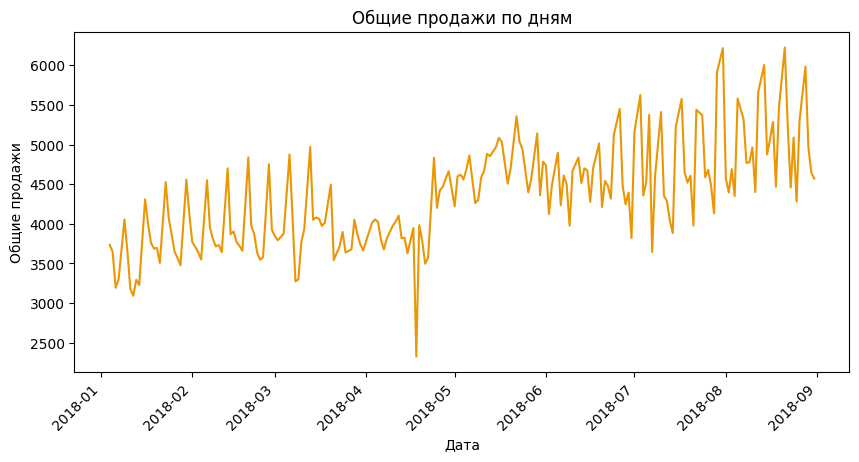

In [10]:
plt.figure(figsize=(10, 5))
grouped_df.plot(kind='line', color='#EB9605')
plt.xlabel('Дата')
plt.ylabel('Общие продажи')
plt.title('Общие продажи по дням')
plt.xticks(rotation=45)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
max_sales_row = df[df['Количество'] == df['Количество'].max()]
print("Row with the highest sales outlier:")
print(max_sales_row)

Row with the highest sales outlier:
             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [12]:
# Convert 'Дата' to datetime if not already in datetime format
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

# Filter for June, July, and August from Warehouse 3
summer_data = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Склад'] == 3)]

# Group by 'Товар' and calculate average sales for each product
top_product = summer_data.groupby('Номенклатура')['Количество'].mean().idxmax()
print("Top product by average sales for June, July, and August from Warehouse 3:", top_product)


Top product by average sales for June, July, and August from Warehouse 3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

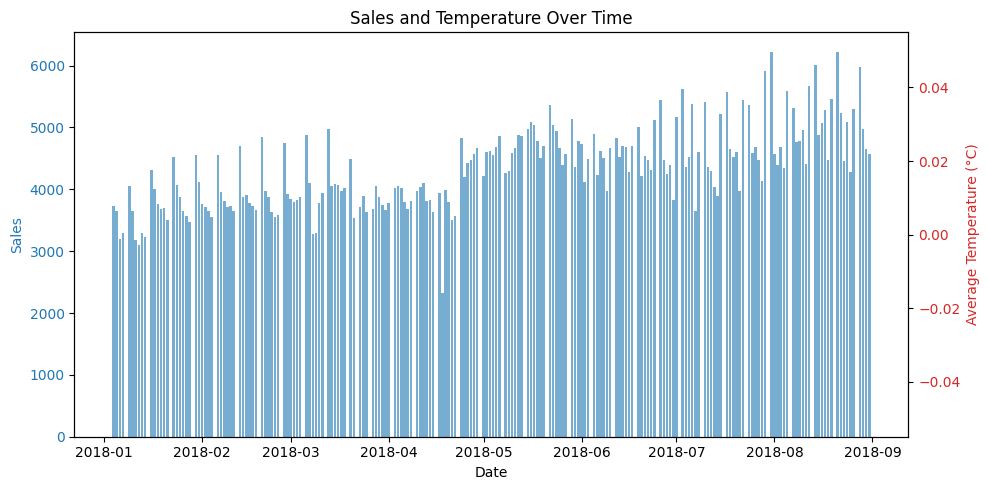

In [ ]:
# Define the path to the weather data file
weather_file_path = r'C:\\Users\\User\\Desktop\\Final Project (Endterm)\\Python Block\\35188.02.01.2018.30.09.2018.1.0.0.ru.utf8.00000000.csv'
# Define the path to the sales data file
sales_file_path = r'C:\\Users\\User\\Desktop\\Final Project (Endterm)\\Python Block\\data.csv'

# Load the weather data with error handling and select necessary columns
weather_df = pd.read_csv(
    weather_file_path,
    delimiter=';', 
    encoding='utf-8',
    usecols=['Местное время в Астане', 'T'],  # Ensure these are the correct columns
    on_bad_lines='skip'
)
weather_df.columns = ['Date', 'Temperature']  # Rename columns for consistency

# Convert 'Date' to datetime format and drop rows with invalid dates
weather_df['Date'] = pd.to_datetime(weather_df['Date'], dayfirst=True, errors='coerce')
weather_df = weather_df.dropna(subset=['Date'])

# Resample the data by day to calculate the daily average temperature
weather_daily_avg = weather_df.resample('D', on='Date').mean().reset_index()

# Load the sales data and convert 'Дата' column to datetime
sales_df = pd.read_csv(sales_file_path)
sales_df['Дата'] = pd.to_datetime(sales_df['Дата'], errors='coerce')
sales_df = sales_df.dropna(subset=['Дата'])
sales_df.rename(columns={'Дата': 'Date', 'Количество': 'Sales'}, inplace=True)

# Aggregate sales data by day if needed
sales_daily = sales_df.groupby('Date')['Sales'].sum().reset_index()

# Merge sales data with daily average temperature data on 'Date'
merged_df = pd.merge(sales_daily, weather_daily_avg, on='Date', how='left')

# Plot both Sales and Temperature data over time
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Sales on primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='tab:blue')
ax1.bar(merged_df['Date'], merged_df['Sales'], color='tab:blue', label='Sales', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot Temperature on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', color='tab:red')
ax2.plot(merged_df['Date'], merged_df['Temperature'], color='tab:red', label='Temperature')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and show plot
plt.title('Sales and Temperature Over Time')
fig.tight_layout()
plt.show()
